# ISAMBARD
## A Computational Framework for Structural Bioinformatics and Parametric Design of Proteins
### Chris Wells Wood - Woolfson Group - University of Bristol, UK
### CBioVikings - 2017-11-24

GitHub: [ChrisWellsWood](https://github.com/ChrisWellsWood)<br/>
Twitter: [@ChrisWellsWood](https://twitter.com/ChrisWellsWood)<br/>
YouTube: [Acodemic](https://www.youtube.com/acodemic)

# Who am I?

* Undergraduate degree in Molecular and Cellular biology, University of Glasgow
* PhD/postdoc in protein design, Woolfson group, University of Bristol
* Originally a molecular biologist
* Do a bit of peptide chemistry, biophysics, structural biology
* Now I mostly write software

### Formal Qualifications

<div align=center><img src="imgs/qualifications.jpg"/></div>

* Show of hands...

# What is a bioinformatician? 

<div align=center><img src="imgs/bioinformatics_chart1.png"/></div>
[Anthony P. Fejes](http://blog.fejes.ca/?p=2418) via Gail Bartlett

# Bioinformaticians as consumers of software

Here's some of the tools I use for structural bioinformatics:

### Basic Tools

* Linux > macOS > Windows (I don't hate Windows!)
* Scripting
    * Python
    * Bash
    * Perl
* Databases
    * SQLite
    * MySQL
    * PostGres
    * MongoDB

### Structural Databases

* [PDBe](https://www.ebi.ac.uk/pdbe/) and [PDB Redux](https://pdb-redo.eu/) - Structural databases
* [CATH](http://www.cathdb.info/) and [SCOP2](http://scop2.mrc-lmb.cam.ac.uk/) - Structure classification.

### Webtools

* [PDBe Fold](http://www.ebi.ac.uk/msd-srv/ssm/) - 3D alignment across the PDB.
* [Jpred](http://www.compbio.dundee.ac.uk/jpred/) (or [PsiPred](http://bioinf.cs.ucl.ac.uk/psipred/)) - Secondary structure prediction.
* [MPI Bioinformatics Toolkit](https://toolkit.tuebingen.mpg.de/) - Sequence bioinformatics

### MD

* [OpenMM](http://openmm.org/) - Molecular dynamics simulations.
* [Gromacs](http://www.gromacs.org/) - Molecular dynamics simulations.
* [MDTraj](http://mdtraj.org/1.9.0/) - MD analysis

### Useful programs

* [DSSP](http://swift.cmbi.ru.nl/gv/dssp/) - Assignment of secondary structure.
* [Scwrl](http://dunbrack.fccc.edu/scwrl4/) - Sidechain packing.
* [ProFit](http://www.bioinf.org.uk/programs/profit/) - Structural alignment.
* [Reduce](http://kinemage.biochem.duke.edu/software/reduce.php) - Adding hydrogen atoms.
* [Pymol](https://pymol.org/) and [VMD](http://www.ks.uiuc.edu/Research/vmd/) - Visualisation.

# Bioinformaticians as Software Developers

* Most of this software is developed by bioinformaticians

## Software Development

* Python
* Rust, C/C++
* HTML5 (HTML, CSS, JS)
* Version control (Git)
* Docker

I write software to design proteins...

# ISAMBARD

* Intelligent System for Analysis Model Building And Rational Design
* Python module
* Primarily designed for parametric design of proteins
* Contains lots of tools for structural bioinformatics
* Open source available through [ISAMBARD on GitHub](https://github.com/woolfson-group/isambard)
    * [Decent documentation](https://woolfson-group.github.io/isambard/)
    * [Tutorial material](https://github.com/woolfson-group/isambard/wiki) (including this notebook!)
    * Lots of support available

[Wood *et al* (2017) Bioinformatics, **33**, 3043–3050](https://academic.oup.com/bioinformatics/article/33/19/3043/3861331)

Let's get started! Everyone familiar with:

* Python?
* Jupyter Notebook?

Start by importing ISAMBARD:

In [1]:
import isambard
import isambard.ampal as ampal

# Load a Structure

You can load a PDB file, but it must adhere to the [PDB spec](http://www.wwpdb.org/documentation/file-format-content/format33/v3.3.html). *mmCIF (PDBx) support coming soon.*

In [2]:
ubiq = ampal.convert_pdb_to_ampal('structures/1ubq.pdb')

In [133]:
print(ubiq.pdb[:300])

HEADER ISAMBARD Model 1ubq                                                             
ATOM      1  N   MET A   1      27.340  24.430   2.614  1.00  9.67           N  
ATOM      2  CA  MET A   1      26.266  25.413   2.842  1.00 10.38           C  
ATOM      3  C   MET A   1      26.913  26.639   3


## Visualise a Structure
You can visualise a structure here in the notebook using [NGL View](https://github.com/arose/nglview).

In [4]:
import nglview

In [5]:
def show_cartoon_and_bs(pdb_str, selection='protein'):
    view = nglview.show_text(pdb_str)
    view.add_ball_and_stick(selection=selection, opacity=0.5)
    return view

In [134]:
show_cartoon_and_bs(ubiq.pdb, 'protein')

A Jupyter Widget

## Basic Analysis

Once a structure is loaded, lots of basic analysis can be performed.

In [7]:
ubiq.sequences

['MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG']

In [8]:
ubiq.molecular_weight

8564.736480000001

In [9]:
ubiq.isoelectric_point

7.100000000000005

In [135]:
ubiq.molar_extinction_280

1280

## The AMPAL Framework

* Biomolecular structure in ISAMBARD is represented using the AMPAL framework
* Atom, Monomer, Polymer, Assembly, Ligand
* AMPAL objects have an intuitive hierarchy:

`Assembly` > `Polymer` > `Monomer` > `Atom`

## Selections

You can select chains, residues, atoms using indexes, slices and keys.

### Assembly Level

In [139]:
ubiq[0]  # the 0th polymer

<Polypeptide containing 76 Residues. Sequence: MQIFVKTLTGKT...>

In [12]:
ubiq['A']  # the polymer labelled A

<Polypeptide containing 76 Residues. Sequence: MQIFVKTLTGKT...>

### Polymer Level

Lots of the basic analysis can also be performed at the polyer level.

In [140]:
ch_a = ubiq['A']
ch_a

<Polypeptide containing 76 Residues. Sequence: MQIFVKTLTGKT...>

In [88]:
ch_a.sequence

'MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG'

In [141]:
ch_a.molecular_weight

8564.736480000001

In [93]:
ch_a[0]  # the 0th residue

<Residue containing 8 Atoms. Residue code: MET>

In [17]:
ch_a['1']  # The residue with the label '1'

<Residue containing 8 Atoms. Residue code: MET>

The 1th residue is not the residue with the label '1'!

In [18]:
ch_a[1] is ch_a['1']  # the 1th residue is not the residue with the label '1'!

False

In [19]:
ch_a[1] is ch_a['2']

True

A slice of polymer returns a polymer.

In [95]:
ch_a[:30]  # 

<Polypeptide containing 30 Residues. Sequence: MQIFVKTLTGKT...>

In [142]:
show_cartoon_and_bs(ch_a[40:-10].pdb)

A Jupyter Widget

You can make slices using residue `ids`.

In [143]:
print([res.id for res in ch_a])

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76']


In [23]:
ch_a.get_slice_from_res_id('30', '60')

<Polypeptide containing 31 Residues. Sequence: IQDKEGIPPDQQ...>

In [144]:
show_cartoon_and_bs(ch_a.get_slice_from_res_id('30', '60').pdb)

A Jupyter Widget

### Monomer Level

In [98]:
res_23 = ch_a['23']
res_23

<Residue containing 8 Atoms. Residue code: ILE>

In [26]:
res_23.mol_code

'ILE'

In [152]:
res_23.atoms

OrderedDict([('N', <Nitrogen Atom (N). Coordinates: (31.113, 20.863, 15.860)>),
             ('CA', <Carbon Atom (CA). Coordinates: (31.288, 22.201, 16.417)>),
             ('C', <Carbon Atom (C). Coordinates: (32.776, 22.519, 16.577)>),
             ('O', <Oxygen Atom (O). Coordinates: (33.233, 23.659, 16.384)>),
             ('CB', <Carbon Atom (CB). Coordinates: (30.520, 22.300, 17.764)>),
             ('CG1',
              <Carbon Atom (CG1). Coordinates: (29.006, 22.043, 17.442)>),
             ('CG2',
              <Carbon Atom (CG2). Coordinates: (30.832, 23.699, 18.358)>),
             ('CD1',
              <Carbon Atom (CD1). Coordinates: (28.407, 22.948, 16.366)>)])

In [153]:
show_cartoon_and_bs(res_23.pdb)

A Jupyter Widget

### Atom Level

In [100]:
r23ca = res_23['CA']

In [30]:
r23ca

<Carbon Atom (CA). Coordinates: (31.288, 22.201, 16.417)>

In [31]:
r23ca.element

'C'

In [157]:
r23ca.array

array([ 31.288,  22.201,  16.417])

## Crawling back up the hierarchy

In [33]:
r23ca

<Carbon Atom (CA). Coordinates: (31.288, 22.201, 16.417)>

In [159]:
r23ca.ampal_parent

<Residue containing 8 Atoms. Residue code: ILE>

In [35]:
r23ca.ampal_parent is res_23

True

In [36]:
r23ca.ampal_parent.ampal_parent

<Polypeptide containing 76 Residues. Sequence: MQIFVKTLTGKT...>

In [37]:
r23ca.ampal_parent.ampal_parent is ch_a

True

In [38]:
r23ca.ampal_parent.ampal_parent.ampal_parent

<Assembly (1ubq) containing 1 Polypeptide, 58 Ligands>

In [39]:
r23ca.ampal_parent.ampal_parent.ampal_parent is ubiq

True

## Special Selections

*Requires DSSP*

In [40]:
ubiq.helices

<Assembly (1ubq) containing 1 Polypeptide>

In [160]:
show_cartoon_and_bs(ubiq.helices.pdb)

A Jupyter Widget

In [42]:
ubiq.strands

<Assembly (1ubq) containing 5 Polypeptides>

In [161]:
show_cartoon_and_bs(ubiq.strands.pdb)

A Jupyter Widget

## Working with Ligands

In [44]:
carb_an = ampal.convert_pdb_to_ampal('structures/3qy1.pdb')

In [168]:
carb_an

<Assembly (3qy1) containing 2 Polypeptides, 449 Ligands>

In [169]:
view = nglview.show_text(carb_an.pdb)
view.add_spacefill('ion')
view

A Jupyter Widget

In [48]:
all_ligands = carb_an.get_ligands()

In [171]:
print([lig.mol_code for lig in all_ligands][:20])

['ZN', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH']


In [176]:
def not_water(ligand):
    return ligand.mol_code != 'HOH'

In [182]:
list(filter(lambda x: x.mol_code != 'HOH', all_ligands))

[<Ligand containing 1 Atom. Ligand code: ZN>,
 <Ligand containing 1 Atom. Ligand code: ZN>]

In [51]:
zn_ligand = all_ligands[0]

In [52]:
zn_atom = zn_ligand['ZN']

Which residues are close to the Zn atom?

In [190]:
residues = set()
for atom in carb_an.get_atoms(ligands=False):
    if isambard.geometry.distance(atom, zn_atom) < 3:
        residues.add(atom.ampal_parent)

In [191]:
residues

{<Residue containing 6 Atoms. Residue code: CYS>,
 <Residue containing 8 Atoms. Residue code: ASP>,
 <Residue containing 10 Atoms. Residue code: HIS>,
 <Residue containing 6 Atoms. Residue code: CYS>}

There's a better way!

In [197]:
carb_an.is_within(3, zn_atom)

[<Sulfur Atom (SG). Coordinates: (-4.322, -18.933, -17.640)>,
 <Oxygen Atom (OD2). Coordinates: (-4.771, -22.057, -19.213)>,
 <Nitrogen Atom (NE2). Coordinates: (-6.209, -19.569, -20.787)>,
 <Sulfur Atom (SG). Coordinates: (-7.753, -20.619, -17.709)>,
 <Zinc Atom (ZN). Coordinates: (-5.817, -20.172, -18.798)>]

In [115]:
{atom.ampal_parent for atom in carb_an.is_within(3, zn_atom)}

{<Residue containing 6 Atoms. Residue code: CYS>,
 <Residue containing 6 Atoms. Residue code: CYS>,
 <Residue containing 10 Atoms. Residue code: HIS>,
 <Ligand containing 1 Atom. Ligand code: ZN>,
 <Residue containing 8 Atoms. Residue code: ASP>}

And an even better way!

In [57]:
zn_ligand.close_monomers(carb_an, cutoff=3.0)

[<Residue containing 6 Atoms. Residue code: CYS>,
 <Residue containing 8 Atoms. Residue code: ASP>,
 <Residue containing 10 Atoms. Residue code: HIS>,
 <Residue containing 6 Atoms. Residue code: CYS>,
 <Ligand containing 1 Atom. Ligand code: ZN>]

In [200]:
close_to_zinc = zn_ligand.close_monomers(carb_an, cutoff=3.0)
view = nglview.show_text(carb_an.pdb)
for mon in close_to_zinc:
    chain = mon.ampal_parent.id
    view.add_ball_and_stick(f'{mon.id}:{chain}')
view.add_spacefill('ion')
view.remove_cartoon()
view.add_trace('protein')
view

A Jupyter Widget

Let's have a little break...

# Protein Design

Can be thought of as the reverse protein folding problem

<div align=center><img src="imgs/seq-to-struct.png"/></div>

# Protein Design

<div align=center><img src="imgs/struct-to-sequence.png"/></div>

Why design proteins?

1. Design proteins with useful properties
2. Learn how protein sequence relates to structure

# The curse of dimensionality...

<div align=center><img src="imgs/protein-backbone.png"/></div>

$$N = 3(n-1)$$

[Random Walk](vids/curse.webm)

In order to design proteins we must restrict the structural space we need to model!

Range of methods to do this:

* Scaffold-based
* Fragment-based
* **Parametric**

# Parametric Design

Describe backbone structure using a small number of simple geometric parameters.

Advantages:

* Vastly reduces the structural space
* Purely mathematical
    * Access the "dark matter" of protein folding space

Disadvantages:

* Fold needs to be parametrizable
* Need method for generating sequences

# α-Helical Coiled Coils

* Simple fold consisting of 2 or more helices
* Helices wrap around each other to form a rope-like super-helical assembly
* Driven by close packing of hydrophobic residues

<div align=center><img width="800" src="imgs/coiled-coil-structure.png"/></div>

The simplest coiled coils can be described with only 3 parameters.

<div align=center><img width="800" src="imgs/coiled-coil-parameters.png"/></div>

When describing structure with backbone torsion angles:

$$N = 3(n-1)$$

Using the parametric model:

$$N = 3$$

# CCBuilder

Let's play with this model... [CCBuilder 2.0](http://coiledcoils.chm.bris.ac.uk/ccbuilder2/builder)

[Wood CW *et al* (2014) Bioinformatics, **30**, 3029-3035](https://academic.oup.com/bioinformatics/article-lookup/doi/10.1093/bioinformatics/btu502)

[Wood CW *et al* (2017) Protein Science, DOI: 10.1002/pro.3279](http://onlinelibrary.wiley.com/doi/10.1002/pro.3279/abstract)

Let's model some coiled coils in ISAMBARD!

# Parametric Modelling in ISAMBARD

Two layers to parametric description
* Backbone (Polymer-level specifications)
* Fold (Assembly-level specifications)

<div align=center><img src="imgs/paths.png"/></div>

In [59]:
from isambard.ampal.specifications import CoiledCoil

In [202]:
cc_di = CoiledCoil(2)

In [203]:
show_cartoon_and_bs(cc_di.pdb)

A Jupyter Widget

## Adding Sidechains

*Requires SCWRL4*

In [205]:
cc_di.pack_new_sequences(['EIAALKQEIAALKKENAALKWEIAALKQ']*2)

In [206]:
show_cartoon_and_bs(cc_di.pdb)

A Jupyter Widget

Where are the parameters?

In [64]:
cc_di.major_radii

[5.07, 5.07]

In [65]:
cc_di.major_pitches

[225.8, 225.8]

In [66]:
cc_di.phi_c_alphas

[283.56, 283.56]

In [120]:
cc_hex = CoiledCoil.from_parameters(6, 28, 9.2, 220, 18)

In [207]:
show_cartoon_and_bs(cc_hex.pdb)

A Jupyter Widget

# Specifications Describe Shapes Not Folds

In [69]:
collagen = CoiledCoil.tropocollagen(28, 3.3, 59)

In [208]:
show_cartoon_and_bs(collagen.pdb)

A Jupyter Widget

These folds are related!

Backbone and fold being described separately allows reuse of parameterisations.

<div align=center><img src="imgs/parametric_models.png"/></div>

# With great power comes great responsibility.

* You are only restricted by the geometric model

In [71]:
crazy_dimer = CoiledCoil.from_parameters(2, 28, 2, 180, 20)
crazy_dimer.pack_new_sequences(['EIAALKQEIAALKKENAALKWEIAALKQ']*2)

In [209]:
show_cartoon_and_bs(crazy_dimer.pdb)

A Jupyter Widget

Need methods to evaluate structure

* Geometry of backbone
* All-atom scoring functions

# BUDE Force Field

* Developed in UoB by the Sessions group
* All atom force field
* Pairwise decomposable
* Fast
* Soft (good for parametric design)

[McIntosh-Smith,S. *et al* (2011) Comput. J., 55, 192-205.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4425459/)

In [216]:
ccdi_bie = cc_di.buff_interaction_energy
ccdi_bie

<BUFF Score -95.02: 9.22 St | -97.36 De | -6.89 Ch>

In [74]:
crazy_bie = crazy_dimer.buff_interaction_energy
crazy_bie

<BUFF Score 2720.31: 3080.31 St | -290.06 De | -69.93 Ch>

# Use all the scoring functions!

* Don't trust BUDE or any other scoring function
* Meta scoring

# But I don't know the parameters!

In [75]:
import numpy
import matplotlib.pyplot as plt

%matplotlib notebook

In [76]:
radii = numpy.arange(2.0, 8.2, 0.2)
scores = []
for radius in radii:
    dimer = CoiledCoil.from_parameters(2, 28, radius, 180, 20)
    dimer.pack_new_sequences(['EIAALKQEIAALKKENAALKWEIAALKQ']*2)
    scores.append(dimer.buff_interaction_energy.total_energy)

<IPython.core.display.Javascript object>


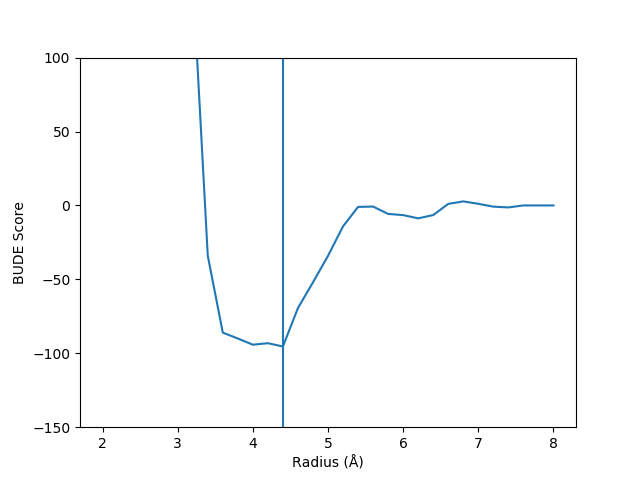

Text(0,0.5,'BUDE Score')

In [77]:
scores_with_radii = zip(scores, radii)
fig, ax = plt.subplots()
ax.plot(radii, scores)
ax.axvline(min(scores_with_radii)[1])
ax.set_ylim(-150, 100)
ax.set_xlabel('Radius (Å)')
ax.set_ylabel('BUDE Score')

# We can fit the parameters using a scoring function!

# Parameter Optimisation

* Fit parameters using a scoring function
* Parameter space can be very large
* Use metaheuristics

Need three things to optimise a model:

1. Specification
1. Sequence
1. Parameters

In [78]:
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter

In [217]:
specification = CoiledCoil.from_parameters

In [218]:
sequences = ['EIAALKQEIAALKKENAALKWEIAALKQ', 'EIAALKQEIAALKKENAALKWEIAALKQ']

In [79]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 28),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 180, 100),
    Parameter.dynamic('PhiCA', -78, 27),  # -78 is equivalent a g position
]

In [223]:
[x.default_value for x in parameters]

[2, 28, 5.0, 180, -78]

In [81]:
opt_ga = ev_opts.GA.buff_internal_eval(specification, sequences, parameters)

In [224]:
opt_ga.run_opt(100, 5, cores=8)

gen	evals	avg     	std    	min     	max     
0  	73   	-829.503	46.8813	-971.265	-757.422
1  	64   	-869.61 	38.1134	-989.834	-812.608
2  	76   	-898.829	32.7972	-989.834	-860.773
3  	59   	-920.413	29.1229	-990.072	-883.552
4  	73   	-941.885	29.1812	-993.209	-904.283
Evaluated 445 models in total in 0:00:35.676655
Best fitness is (-993.2085983932703,)
Best parameters are [2, 28, 4.6360064263637755, 126.42579361211408, -81.87723844745896]


[Optimisation](vids/opt.webm)

In [83]:
optimized_model = opt_ga.best_model

In [225]:
show_cartoon_and_bs(optimized_model.pdb)

A Jupyter Widget

You can use any scoring function you like, as long as it spits out a float and follows the thermodynamic convention.

# α-Helical Barrels

* We used this parametric modelling combined with a sequence-based method to design a novel class of coiled coil

[Thomson AR, Wood CW *et al* (2014) Science, **346**,  485-488](http://science.sciencemag.org/content/346/6208/485)

<div align=center><img src="imgs/barrel-design.png"/></div>

# Summary

ISAMBARD can be used for:

* Structural analysis of biomolcules
* Parametric modelling of proteins
* Fitting parameters for parametric models

ISAMBARD is:

* Free
* Open source
* Modular

<div align=center><img src="imgs/acknowledgements.png"/></div>